In [1]:
import os
import json
from pprint import pprint
import requests
import pandas as pd
import time
#from config import api_key, g_key, second_key
import gmaps
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = "Resources/Federal_Overview.csv"

In [3]:
final_df = pd.read_csv(file)
final_df.head()

,Unnamed: 0,Business Name,Address,City,State,Zip,Country,Number of Actions,Dollars Obligated,Per Capita Spending,Range of Actions,Lat,Lon,Cong. Dis.,Senator 1,Senator 2,Representative,Party 1,Party 2,Party 3
0,0,LOCKHEED MARTIN CORPORATION,700 N FREDERICK AVE,GAITHERSBURG,MD,20879,USA,58430,48665796760,832890.58,"10,000-99,999",39.143969,-77.201606,6.0,Ben Cardin (D),Chris Van Hollen (D),David Trone (D),D,D,D
1,1,"BOEING COMPANY, THE",3373 BRECKINRIDGE BLVD,RICHARDSON,TX,75082,USA,18765,28088703924,1496866.72,"10,000-99,999",32.948334,-96.729852,3.0,John Cornyn (R),Ted Cruz (R),Van Taylor (R),R,R,R
2,2,RAYTHEON COMPANY,5001 US HIGHWAY 30 W,FORT WAYNE,IN,46818,USA,12662,16350781984,1291326.96,"10,000-99,999",41.079273,-85.139351,3.0,Todd Young (R),Mike Braun (R),Jim Banks (R),R,R,R
3,3,MCKESSON CORPORATION,6555 STATE HIGHWAY 161,IRVING,TX,75039,USA,82167,9640424759,117327.21,"10,000-99,999",32.814018,-96.948894,24.0,John Cornyn (R),Ted Cruz (R),Kenny Marchant (R),R,R,R
4,4,"LEIDOS HOLDINGS, INC.",1750 PRESIDENTS ST,RESTON,VA,20190,USA,4830,7272381498,1505669.05,"1,000-9,999",38.958631,-77.357003,11.0,Mark Warner (D),Tim Kaine (D),Gerry Connolly (D),D,D,D


In [4]:
len(final_df)

43

In [5]:
final_df.count

<bound method DataFrame.count of     Unnamed: 0                                   Business Name  \
0            0                     LOCKHEED MARTIN CORPORATION   
1            1                             BOEING COMPANY, THE   
2            2                                RAYTHEON COMPANY   
3            3                            MCKESSON CORPORATION   
4            4                           LEIDOS HOLDINGS, INC.   
5            5                               FLUOR CORPORATION   
6            6         BOOZ ALLEN HAMILTON HOLDING CORPORATION   
7            7                   JACOBS ENGINEERING GROUP INC.   
8            8                             OSHKOSH CORPORATION   
9            9                                    TEXTRON INC.   
10          10                                     PFIZER INC.   
11          11               MANTECH INTERNATIONAL CORPORATION   
12          12                     VERIZON COMMUNICATIONS INC.   
13          13                           MI

In [6]:
final_df.head(n=20)

,Unnamed: 0,Business Name,Address,City,State,Zip,Country,Number of Actions,Dollars Obligated,Per Capita Spending,Range of Actions,Lat,Lon,Cong. Dis.,Senator 1,Senator 2,Representative,Party 1,Party 2,Party 3
0,0,LOCKHEED MARTIN CORPORATION,700 N FREDERICK AVE,GAITHERSBURG,MD,20879,USA,58430,48665796760,832890.58,"10,000-99,999",39.143969,-77.201606,6.0,Ben Cardin (D),Chris Van Hollen (D),David Trone (D),D,D,D
1,1,"BOEING COMPANY, THE",3373 BRECKINRIDGE BLVD,RICHARDSON,TX,75082,USA,18765,28088703924,1496866.72,"10,000-99,999",32.948334,-96.729852,3.0,John Cornyn (R),Ted Cruz (R),Van Taylor (R),R,R,R
2,2,RAYTHEON COMPANY,5001 US HIGHWAY 30 W,FORT WAYNE,IN,46818,USA,12662,16350781984,1291326.96,"10,000-99,999",41.079273,-85.139351,3.0,Todd Young (R),Mike Braun (R),Jim Banks (R),R,R,R
3,3,MCKESSON CORPORATION,6555 STATE HIGHWAY 161,IRVING,TX,75039,USA,82167,9640424759,117327.21,"10,000-99,999",32.814018,-96.948894,24.0,John Cornyn (R),Ted Cruz (R),Kenny Marchant (R),R,R,R
4,4,"LEIDOS HOLDINGS, INC.",1750 PRESIDENTS ST,RESTON,VA,20190,USA,4830,7272381498,1505669.05,"1,000-9,999",38.958631,-77.357003,11.0,Mark Warner (D),Tim Kaine (D),Gerry Connolly (D),D,D,D
5,5,FLUOR CORPORATION,6700 LAS COLINAS BLVD,IRVING,TX,75039,USA,364,5254246845,14434744.08,"Under 1,000",32.814018,-96.948894,24.0,John Cornyn (R),Ted Cruz (R),Kenny Marchant (R),R,R,R
6,6,BOOZ ALLEN HAMILTON HOLDING CORPORATION,8283 GREENSBORO DR,MCLEAN,VA,22102,USA,5731,5146753760,898055.10,"1,000-9,999",38.933868,-77.177260,11.0,Mark Warner (D),Tim Kaine (D),Gerry Connolly (D),D,D,D
7,7,JACOBS ENGINEERING GROUP INC.,200 W FORSYTH ST STE 1520,JACKSONVILLE,FL,32202,USA,3630,3345954535,921750.56,"1,000-9,999",30.332184,-81.655651,5.0,Marco Rubio (R),Rick Scott (R),Al Lawson (D),R,R,D
8,8,OSHKOSH CORPORATION,1917 FOUR WHEEL DR,OSHKOSH,WI,54902,USA,13577,2884558670,212459.21,"10,000-99,999",44.024706,-88.542614,6.0,Ron Johnson (R),Tammy Baldwin (D),Glenn Grothman (R),R,D,R
9,9,TEXTRON INC.,13800 OLD GENTILLY RD BLDG 220,NEW ORLEANS,LA,70129,USA,5483,1719903755,313679.33,"1,000-9,999",29.951066,-90.071532,2.0,Bill Cassidy (R),John Kennedy (R),Cedric Richmond (D),R,R,D


In [7]:
edited_df = final_df[['Business Name','State','Dollars Obligated']]

In [8]:
edited_df.head()

,Business Name,State,Dollars Obligated
0,LOCKHEED MARTIN CORPORATION,MD,48665796760
1,"BOEING COMPANY, THE",TX,28088703924
2,RAYTHEON COMPANY,IN,16350781984
3,MCKESSON CORPORATION,TX,9640424759
4,"LEIDOS HOLDINGS, INC.",VA,7272381498


In [9]:
top_twenty = edited_df[0:20]

In [10]:
top_twenty.head()

,Business Name,State,Dollars Obligated
0,LOCKHEED MARTIN CORPORATION,MD,48665796760
1,"BOEING COMPANY, THE",TX,28088703924
2,RAYTHEON COMPANY,IN,16350781984
3,MCKESSON CORPORATION,TX,9640424759
4,"LEIDOS HOLDINGS, INC.",VA,7272381498


In [11]:
top_twenty.dtypes

Business Name        object
State                object
Dollars Obligated     int64
dtype: object

In [12]:
del top_twenty["Business Name"]

In [13]:
top_twenty.dtypes

State                object
Dollars Obligated     int64
dtype: object

In [14]:
combined_state = top_twenty.groupby(["State"]).sum()

In [15]:
combined_state.head(n=20)

,Dollars Obligated
State,
CO,6877550213
CT,8849258360
FL,10352364333
IN,16350781984
LA,1719903755
MD,48665796760
NY,1842906770
OH,3528154124
TX,42983375528


In [16]:
combined_state["Dollars Obligated"] = combined_state["Dollars Obligated"].map("${:,}".format)

In [17]:
combined_state.head(n=20)

,Dollars Obligated
State,
CO,"$6,877,550,213"
CT,"$8,849,258,360"
FL,"$10,352,364,333"
IN,"$16,350,781,984"
LA,"$1,719,903,755"
MD,"$48,665,796,760"
NY,"$1,842,906,770"
OH,"$3,528,154,124"
TX,"$42,983,375,528"


In [18]:
my_labels = ["CO", "CT", "FL", "IN", "LA", "MD", "NY", "OH", "TX", "VA", "WI"]
my_data = [6877550213, 8849258360, 10352364333, 16350781984, 1719903755, 48665796760, 1842906770, 3528154124, 42983375528, 35153804992, 2884558670]
colors = ["yellow", "green", "lightblue", "orange", "red", "blue", "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

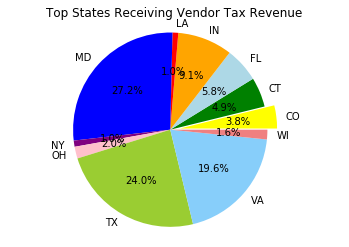

In [19]:
plt.pie(my_data,labels=my_labels,colors=colors,explode=explode,autopct='%1.1f%%')
plt.title('Top States Receiving Vendor Tax Revenue')
plt.axis('equal')
plt.show()